In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Uniqueness score for the names in the India Dataset.

In [29]:
# Load the CSV file
file_path = "IN.csv"
df = pd.read_csv(file_path, header=None)  # Use header=None if the file has no column names

# Assign column names
df.columns = ["First Name", "Last Name", "Gender", "Country Code"]

# Display the first few rows to verify
print(df.head())

    First Name    Last Name Gender Country Code
0         Male          NaN    NaN           IN
1  Kapil Kumar  Kapil Kumar      M           IN
2       Mitali     Aggarwal      F           IN
3        Vikas       Jangra    NaN           IN
4         Ravi       Lungay      M           IN


In [30]:
from collections import Counter
import pandas as pd

# Step 1: Preprocess the data
def preprocess_data(df):
    # Handle missing values and clean up names
    df = df.dropna(subset=["First Name", "Last Name"])  # Drop rows with missing names
    df['First Name'] = df['First Name'].str.lower().str.strip()  # Clean first name
    df['Last Name'] = df['Last Name'].str.lower().str.strip()  # Clean last name
    df['Full Name'] = df['First Name'] + " " + df['Last Name']  # Concatenate first and last name
    return df

# Step 2: Calculate frequency of names and rarity scores
def calculate_scores(df):
    name_counts = Counter(df['Full Name'])
    max_frequency = max(name_counts.values())  # Get the maximum frequency of any name
    scores = {
        name: {
            "Frequency": count,
            "Score": count / max_frequency  # Calculate rarity score
        }
        for name, count in name_counts.items()
    }
    return scores

# Step 3: Save results to a CSV file
def save_scores(scores, output_path):
    # Convert scores dictionary to DataFrame
    scores_df = pd.DataFrame.from_dict(scores, orient='index').reset_index()
    scores_df.columns = ["Full Name", "Frequency", "Score"]
    scores_df.to_csv(output_path, index=False)

# Preprocess data and calculate scores
df = preprocess_data(df)
scores = calculate_scores(df)

# Output file path
output_path = r"C:\Users\neham\OneDrive\Documents\Digio_assignment\second_assignment\name_uniqueness_scores_2.csv"  # Output file path

# Save the results to a CSV file
save_scores(scores, output_path)


C:\Users\neham\AppData\Local\Temp\ipykernel_45632\306976316.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['First Name'] = df['First Name'].str.lower().str.strip()  # Clean first name
C:\Users\neham\AppData\Local\Temp\ipykernel_45632\306976316.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last Name'] = df['Last Name'].str.lower().str.strip()  # Clean last name
C:\Users\neham\AppData\Local\Temp\ipykernel_45632\306976316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [31]:
data=pd.read_csv("name_uniqueness_scores_2.csv")
data

,Full Name,Frequency,Score
0,kapil kumar kapil kumar,23,0.004233
1,mitali aggarwal,3,0.000552
2,vikas jangra,9,0.001656
3,ravi lungay,1,0.000184
4,jagat yadav yadav,1,0.000184
...,...,...,...
3374493,vikas chakchanpur,1,0.000184
3374494,riya naharwal,1,0.000184
3374495,jashandeep hanjra,1,0.000184
3374496,jony bindas,1,0.000184


In [6]:
data['Score'].median()

np.float64(0.0001840264998159)

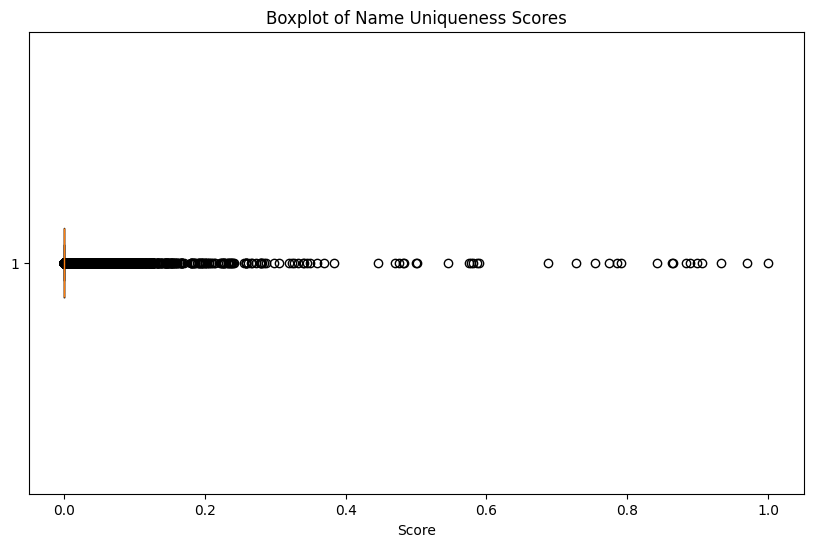

In [8]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Score'], vert=False)
plt.title('Boxplot of Name Uniqueness Scores')
plt.xlabel('Score')
plt.show()

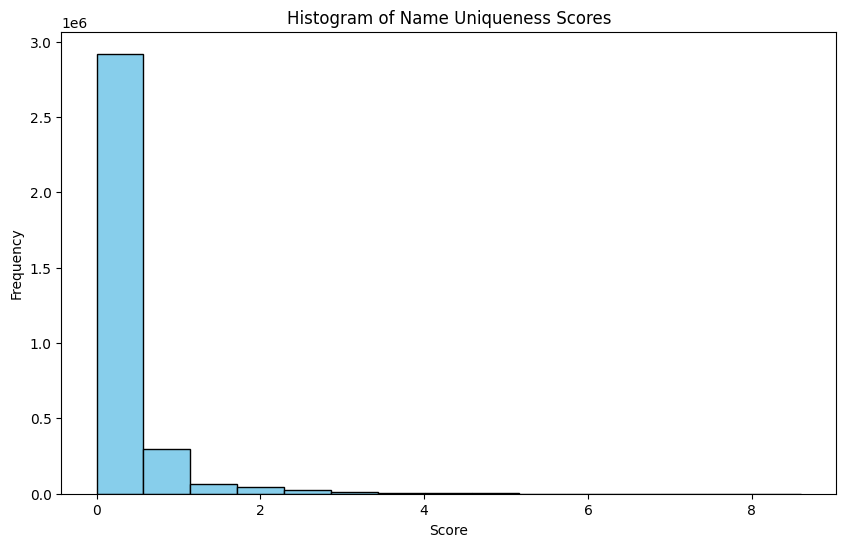

In [13]:
import numpy as np
log_score = np.log(data['Frequency'])
plt.figure(figsize=(10, 6))
plt.hist(log_score, bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Name Uniqueness Scores')
# plt.xlim(0, 0.005)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

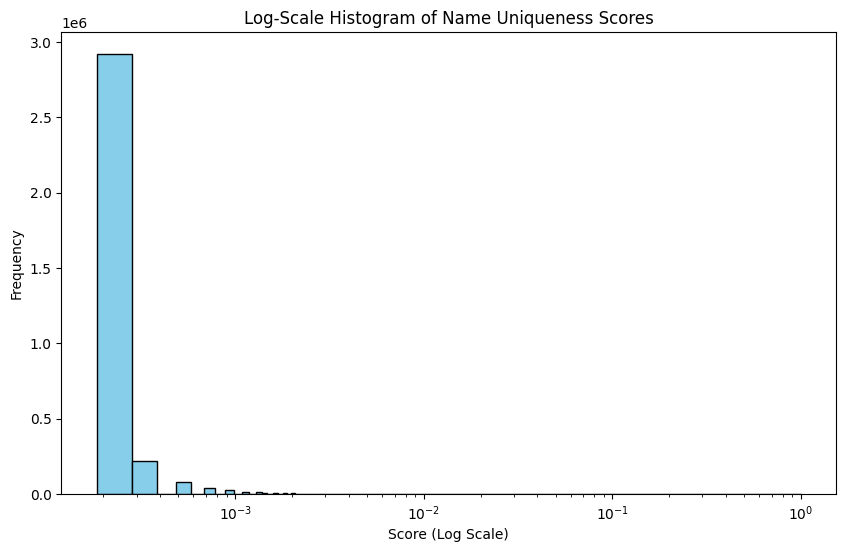

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(data['Score'], bins=10000, color='skyblue', edgecolor='black')
plt.xscale('log')  # Apply log scale to x-axis
plt.title('Log-Scale Histogram of Name Uniqueness Scores')
plt.xlabel('Score (Log Scale)')
plt.ylabel('Frequency')
plt.show()
